In [103]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import skimage
from sklearn import datasets

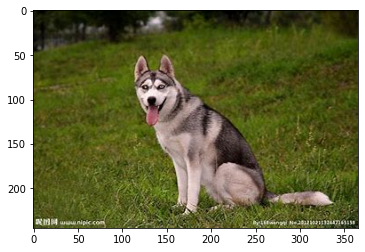

In [54]:
dog = Image.open("hashiqi.jpg")
# dog.show()
plt.imshow(dog)

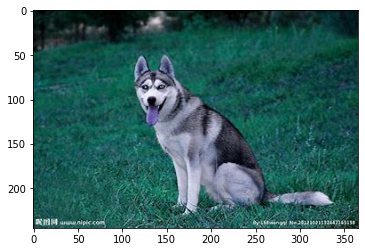

In [55]:
img = cv2.imread("hashiqi.jpg")
plt.imshow(img)
plt.show()

In [56]:
img.shape

(245, 366, 3)

In [57]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

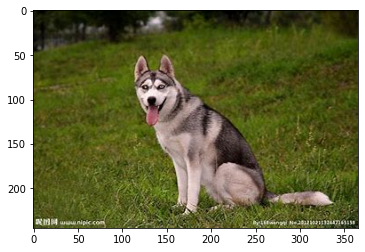

In [58]:
plt.imshow(img)

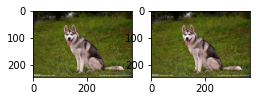

In [59]:
plt.subplot(1,3,1)
plt.imshow(img,cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(img,cmap=plt.cm.gray)

灰度图

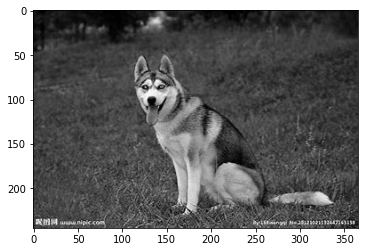

In [60]:
dog_hui = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(dog_hui,cmap=plt.cm.gray)

图像缩放

((245, 366, 3), (200, 200, 3))

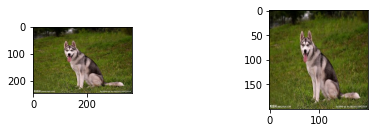

In [61]:
plt.subplot(1,3,1)
plt.imshow(img)
img_small = cv2.resize(img,(200,200))
plt.subplot(1,3,3)
plt.imshow(img_small)
img.shape,img_small.shape

图像缩放的另一个应用场景就是图像增强，比如把原图像缩小，
但是图像大小不变，剩下的空间使用黑色充填

((245, 366, 3), (245, 366, 3))

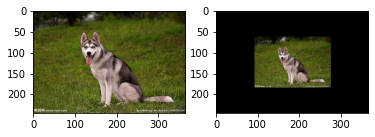

In [62]:
rows,cols,_=img.shape
matrix = cv2.getRotationMatrix2D((cols/2,rows/2),0,0.5)
# 第一个参数为旋转中心坐标，第二个参数为旋转角度，第三个为缩放比例
imgRotate = cv2.warpAffine(img,matrix,(cols,rows))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(imgRotate)
img.shape,imgRotate.shape

图像旋转，可以理解为摄像头或者相机和物体的夹角
发生了变化


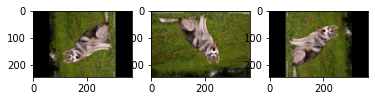

In [63]:
matrix = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
img2 = cv2.warpAffine(img,matrix,(cols,rows))
matrix = cv2.getRotationMatrix2D((cols/2,rows/2),180,1)
img3 = cv2.warpAffine(img,matrix,(cols,rows))
matrix = cv2.getRotationMatrix2D((cols/2,rows/2),270,1)
img4 = cv2.warpAffine(img,matrix,(cols,rows))
plt.subplot(1,3,1)
plt.imshow(img2)
plt.subplot(1,3,2)
plt.imshow(img3)
plt.subplot(1,3,3)
plt.imshow(img4)

图像平移的物理意义，可以理解为摄像头或者相机和物体的水平
及垂直距离发生了变化。

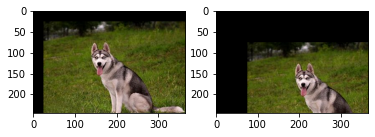

In [64]:
matrix = np.float32([[1,0,25],[0,1,25]])
img1 = cv2.warpAffine(img,matrix,(cols,rows))
matrix = np.float32([[1,0,75],[0,1,75]])
img2 = cv2.warpAffine(img,matrix,(cols,rows))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)

图像裁剪，类似于从图片中剪出部分图像，可以类似于数组切片



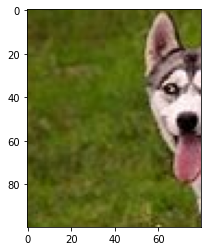

In [65]:
img1 = img[50:150,60:140]
plt.imshow(img1)

图像翻转的物理意义，可以理解为摄像头或者相机和物体的夹角
及距离发生了变化,

[[1.         0.         0.        ]
 [0.33333333 1.         0.        ]]


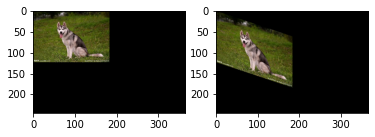

In [66]:
SrcPoints = np.float32([[0,0],[0,150],[150,150]])
CanvasPoints = np.float32([[0,0],[0,150],[150,200]])
matrix = cv2.getRotationMatrix2D((0,0),0,0.5)
img2 = cv2.warpAffine(img,matrix,(cols,rows))
matrix = cv2.getAffineTransform(np.array(SrcPoints),np.array(CanvasPoints))
print(matrix)
img3 = cv2.warpAffine(img2,matrix,(cols,rows))
plt.subplot(1,2,1)
plt.imshow(img2)
plt.subplot(1,2,2)
plt.imshow(img3)

更改 图像的亮度与对比度

$f(X') =\alpha f(x) +\beta $

$\alpha 调整对比度，\beta调整亮度$

np.clip(a_min, a_max)函数将数组中大于或小于a_max,a_min的数改为a_max,a_min

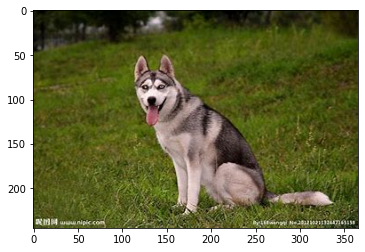

In [67]:
# plt.subplot(3,1,1)
plt.imshow(img)

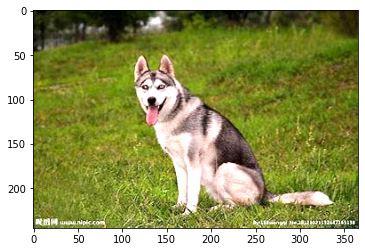

In [68]:
img2 = np.uint8(np.clip((img + 25), 1, 254))
img3 = np.uint8(np.clip((1.5 * img ), 0, 254))
plt.imshow(img3)

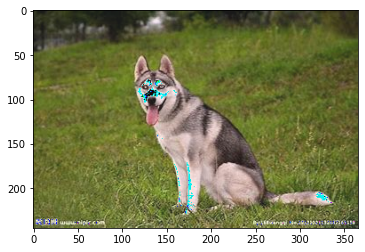

In [69]:
plt.imshow(img2)

椒盐噪声，高斯噪声

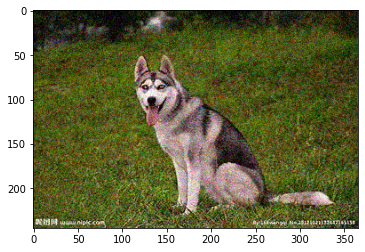

In [70]:
img1 = skimage.util.random_noise(img,mode='gaussian',seed=
                          None,clip=True,mean=0,var=0.01)
plt.imshow(img1)

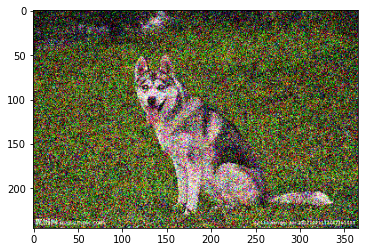

In [71]:
img1 = skimage.util.random_noise(img,mode='gaussian',seed=
                          None,clip=True,mean=0,var=0.09)
plt.imshow(img1)

(<AxesSubplot:>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x1bc1c9c2cc8>)

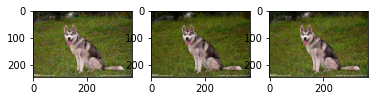

In [72]:
img2=skimage.util.random_noise(img, mode="salt", seed=None, clip=True)
img3=skimage.util.random_noise(img, mode="pepper", seed=None, clip=True)
img4=skimage.util.random_noise(img, mode="s&p", seed=None, clip=True)
plt.subplot(1,3,1),plt.imshow(img2)
plt.subplot(1,3,2),plt.imshow(img3),\
plt.subplot(1,3,3),plt.imshow(img4)

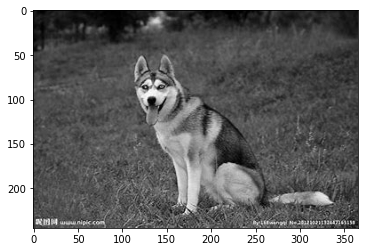

In [73]:
imgt =cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(imgt,cmap=plt.cm.gray)

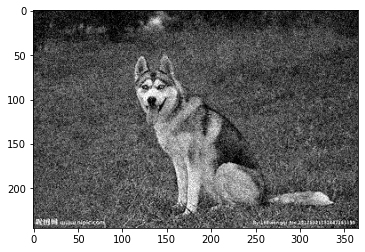

In [83]:
img1 = imgt.copy()
img1 = skimage.util.random_noise(img1, mode="gaussian", seed=None, clip=True,mean=0,var=0.01)

plt.imshow(img1,cmap=plt.cm.gray)
img1 = np.uint8(img1*255)
img2 = cv2.medianBlur(img1,3)

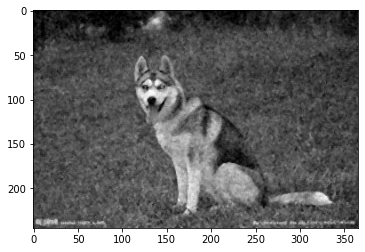

In [81]:
plt.imshow(img2,cmap=plt.cm.gray)

滤波窗口变大会导致图像失真严重

高斯滤波器

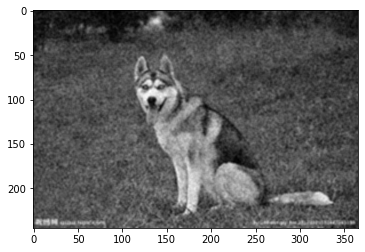

In [94]:
img3 = cv2.GaussianBlur(img1,(3,3),1.3)
plt.imshow(img3,cmap=plt.cm.gray)

高斯双边滤波器

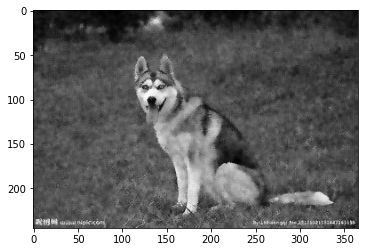

In [97]:
img4 = cv2.bilateralFilter(img1,7,50,50)
plt.imshow(img4,cmap=plt.cm.gray)

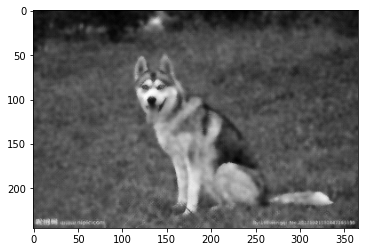

In [104]:
img5 = cv2.bilateralFilter(img1,7,100,100)
plt.imshow(img5,cmap=plt.cm.gray)